In [1]:
from autqec.automorphisms import *
from autqec.utils.qec import *
from autqec.utils.qiskit import *
from autqec.magma_interface import *
from autqec.ZX_dualities import *
from autqec.ZY_dualities import *
import pickle

## [[17,1,3]] 

#### Define code

In [2]:
n = 17
k = 1
d = 7

H_symp = np.load(f'../codetables/parity_checks/H_symp_n{n}k{k}.npy')

#### Automorphism group generators from MAGMA

In [3]:
#code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/',save_magma_commands = False)
filename = f'./auts_data/auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  48960
Time:  0.27
No of aut gens:  9


In [4]:
auts = code_auts_dict['auts']
circuits = []
symp_mats = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    log_act = logical_circ_and_pauli_correct(H_symp,phys_circ)
    circ = log_act.run()
    circuits.append(circ)
    symp_mats.append(log_act.U_logical_act())

In [5]:
filename = f'./auts_data/symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(symp_mats, f)

## Circuit 1

[('H', 1)]


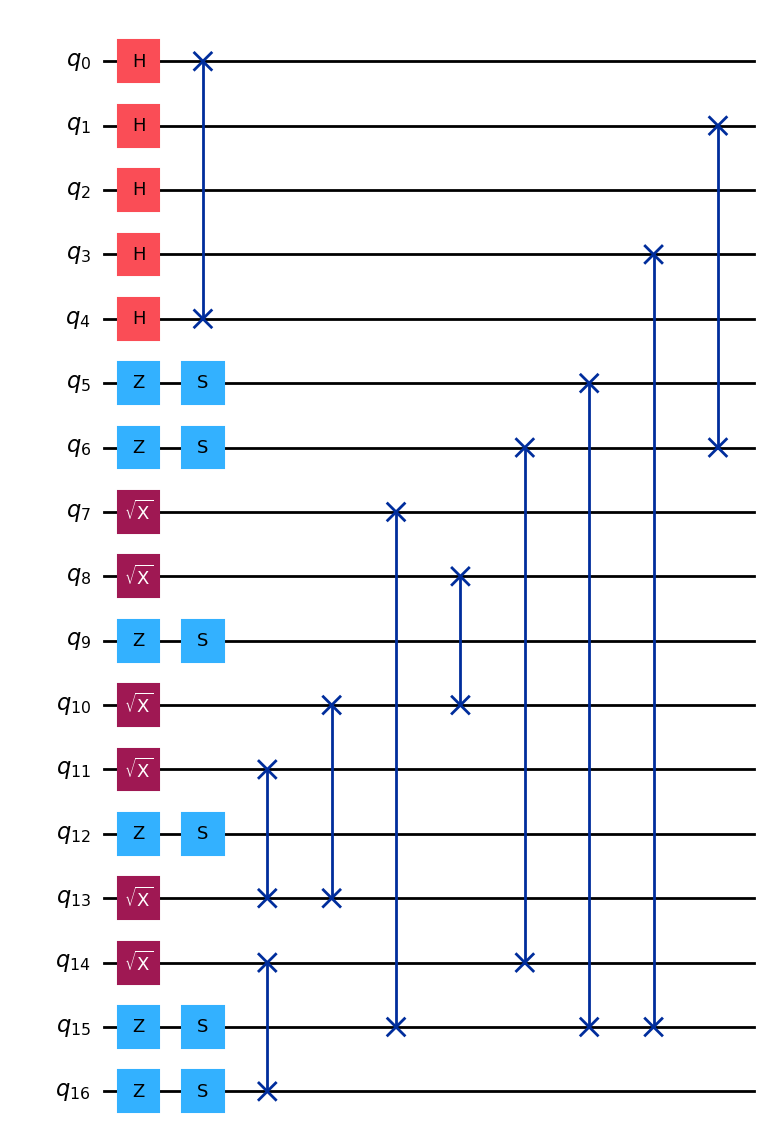

In [6]:
# physical circuit
circ = circuits[0]
print(circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 2

Logical Act: []


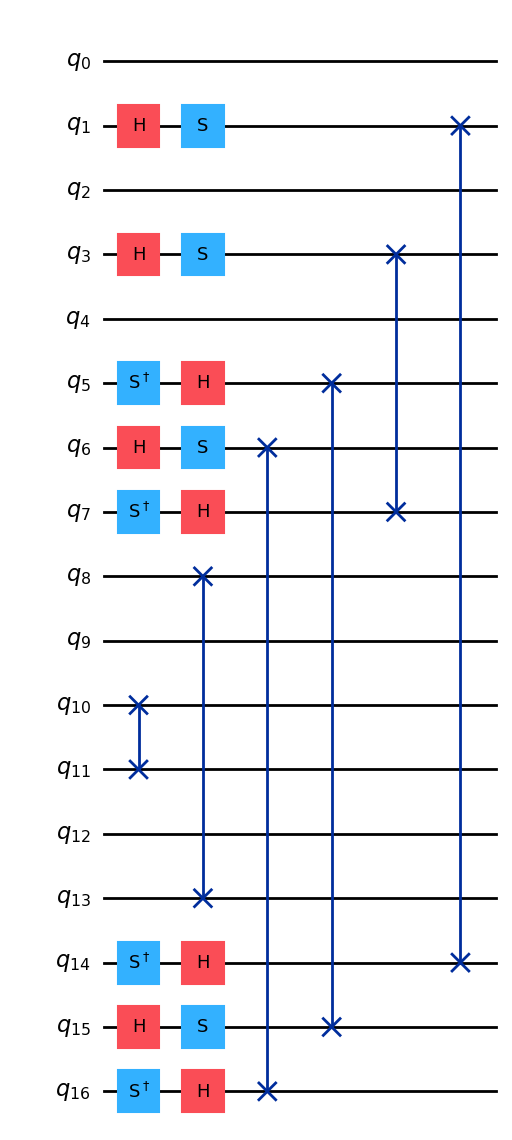

In [7]:
circ = circuits[1]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 3

Logical Act: []


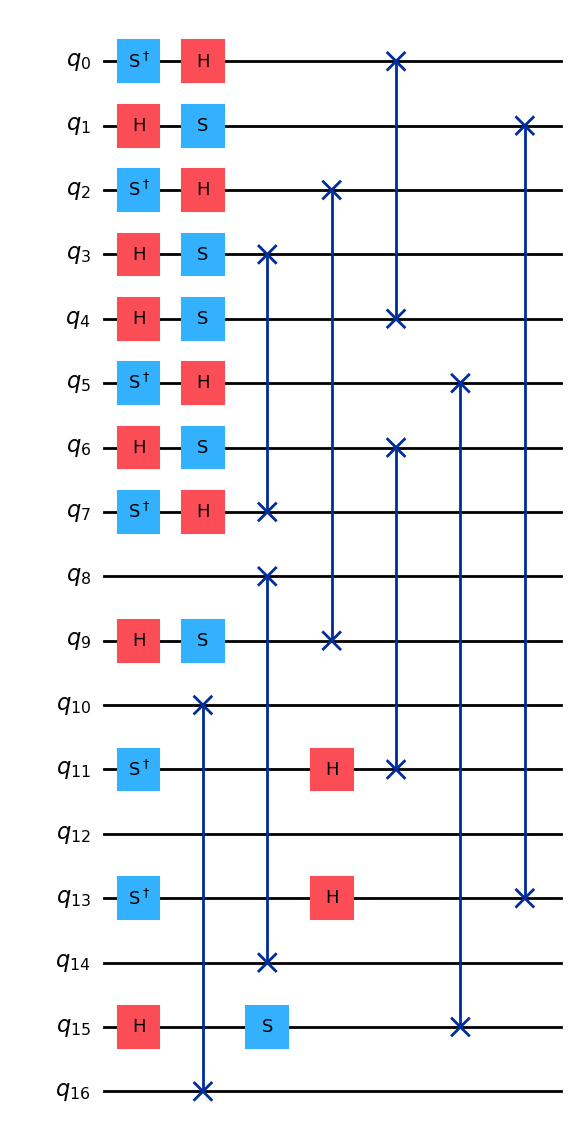

In [8]:
circ = circuits[2]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 4

Logical Act: []


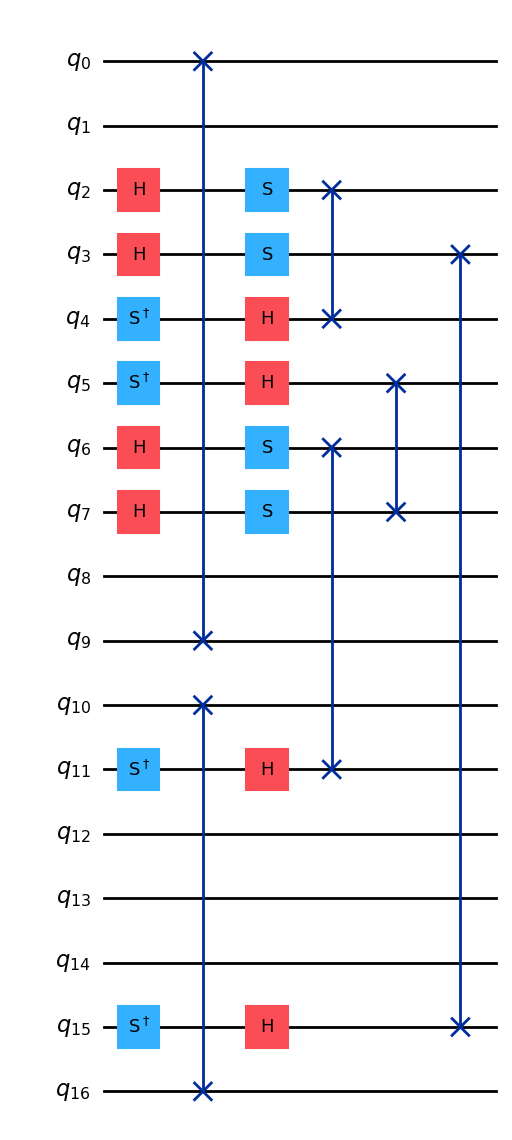

In [9]:
circ = circuits[3]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 5

Logical Act: []


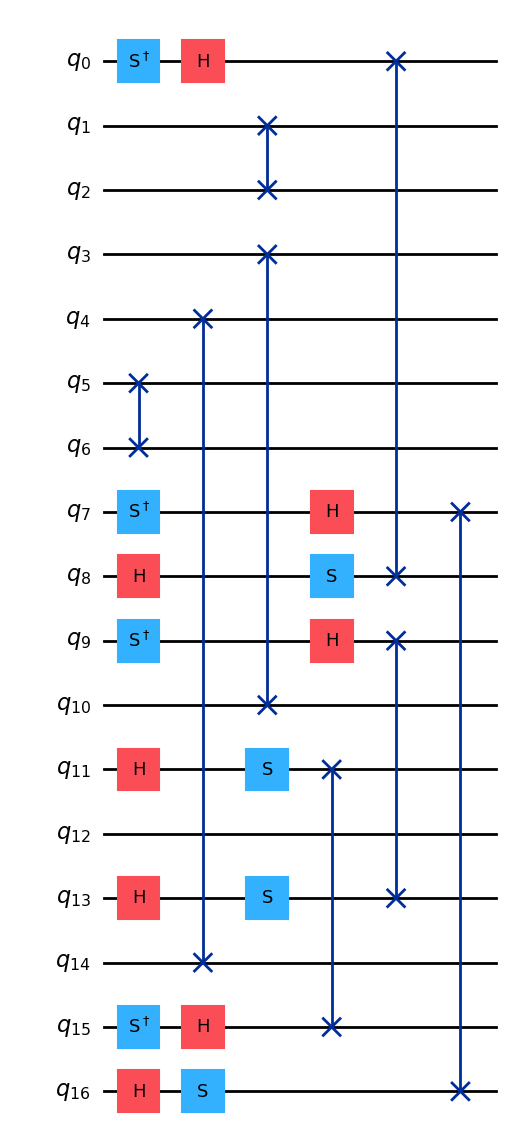

In [10]:
circ = circuits[4]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# ZX duality

In [11]:
#code_auts_dict = qec_code_ZX_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/ZX_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  136
Time:  0.01
No of aut gens:  4


In [12]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = circ_from_ZX_duality(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    circ = logical_circ_and_pauli_correct(H_symp,phys_circ).run()
    circuits.append(circ)

Logical Act: [('H', 1)]


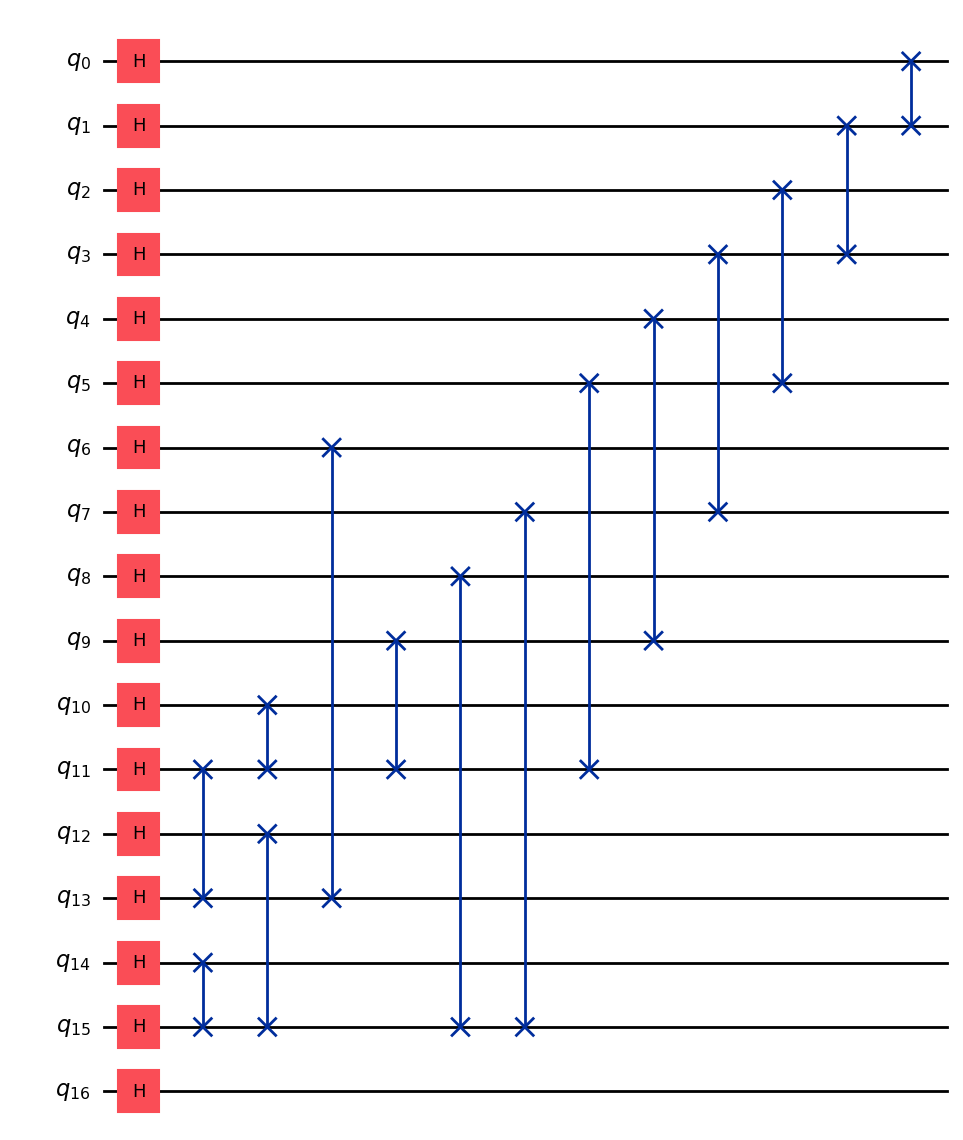

In [13]:
circ = circuits[1]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# ZY duality

In [14]:
#code_auts_dict = qec_code_ZY_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/XY_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  136
Time:  0.01
No of aut gens:  4


In [15]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = circ_from_ZY_duality(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    circ = logical_circ_and_pauli_correct(H_symp,phys_circ).run()
    circuits.append(circ)

Logical Act: [('S', 1)]


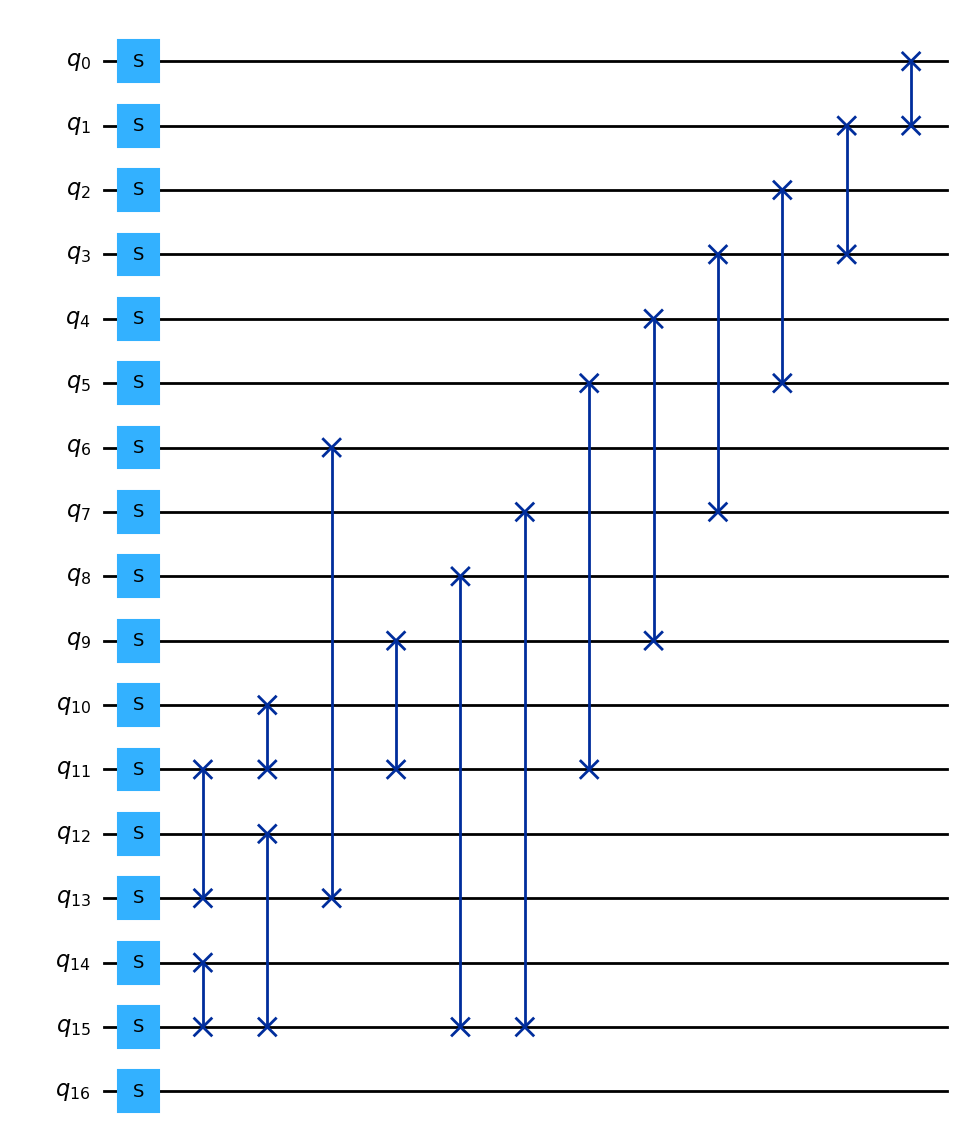

In [16]:
circ = circuits[1]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# Logical Subgroups

In [17]:
filename = f'./auts_data/symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    symp_mats = pickle.load(f)

In [ ]:
from autqec.logical_subgroups import *
gate_group = clifford_subgroups(k,symp_mats) # uses MAGMA
gate_group.return_order()

ModuleNotFoundError: No module named 'logical_subgroups'

In [ ]:
gate_group.return_structure()